In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
def Analyser(path_):
    data = np.load(path_)
    l = data['el']
    r = data['er']
    print('Duration of sample is {}'.format(np.format_float_scientific(len(r))))
    comp_er = [0]
    number_av = 0
    for item in r:
        if item:
            if not comp_er[-1]:
                number_av += 1
            comp_er[-1] += item
        else:
            comp_er.append(0)
    comp_er.pop(-1)
    comp_er = [num for num in comp_er if num]
    comp_er = np.array(comp_er)
    comp_er /= min(comp_er)
    min_av = min(comp_er)
    max_av = max(comp_er)
    print('The number of distinct avalanches is {}\n'.format(number_av),
         'Smallest Avalanche has energy {}\n'.format(np.format_float_scientific(min_av, precision = 2)), 
         'Biggest Avalanche has energy {}'.format(np.format_float_scientific(max_av, precision = 2)))
    xspace = np.logspace(np.log10(min_av), np.log10(max_av), 50, base=10)
    av_number, bins = np.histogram(comp_er, bins = xspace, density = True)
    bins = bins[:-1]
    bins = bins[av_number > 0]
    av_number = av_number[av_number > 0]
    plt.figure()
    plt.title('Distribution of avalanche energies')
    plt.scatter(np.log10(bins), np.log10(av_number))
    plt.xlabel('log10(E)')
    plt.ylabel('Number of Avalanches')
    plt.show()

Duration of sample is 1.e+06
The number of distinct avalanches is 6755
 Smallest Avalanche has energy 1.e+00
 Biggest Avalanche has energy 2.63e+07


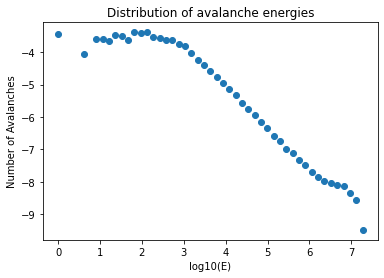

In [129]:
Analyser('../Analysis/D48.npz')

Duration of sample is 1.e+06
The number of distinct avalanches is 1679
 Smallest Avalanche has energy 1.e+00
 Biggest Avalanche has energy 4.22e+07


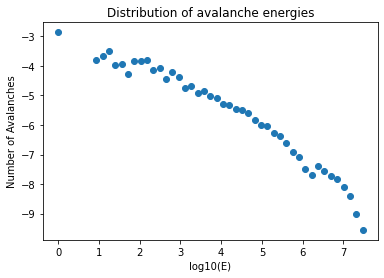

In [130]:
Analyser('../Analysis/F148SOC.npz.npz.npz')